###  PersistAD

`PersistAD` compares each time series value with its previous values. Internally, it is implemented as a [pipenet](#Pipenet) with transformer [DoubleRollingAggregate](#DoubleRollingAggregate).


In the following example, we detect anomalous positive changes of price.

In [10]:
s = pd.read_csv('../docs/notebooks/data/price_short.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\ms28175\AppData\Local\Temp\ipykernel_3664\2482282965.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_short.csv', index_col="Time", parse_dates=True, squeeze=True)


In [ ]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
persist_ad = PersistAD(c=3.0, side='both')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red');

## 1.1

[201, 1463, 934, 720, 314, 277, 1351, 911, 893, 1259, 771, 240, 964, 1071, 1139, 36, 1655, 319, 1369, 434, 1613, 594, 1618, 0, 451]


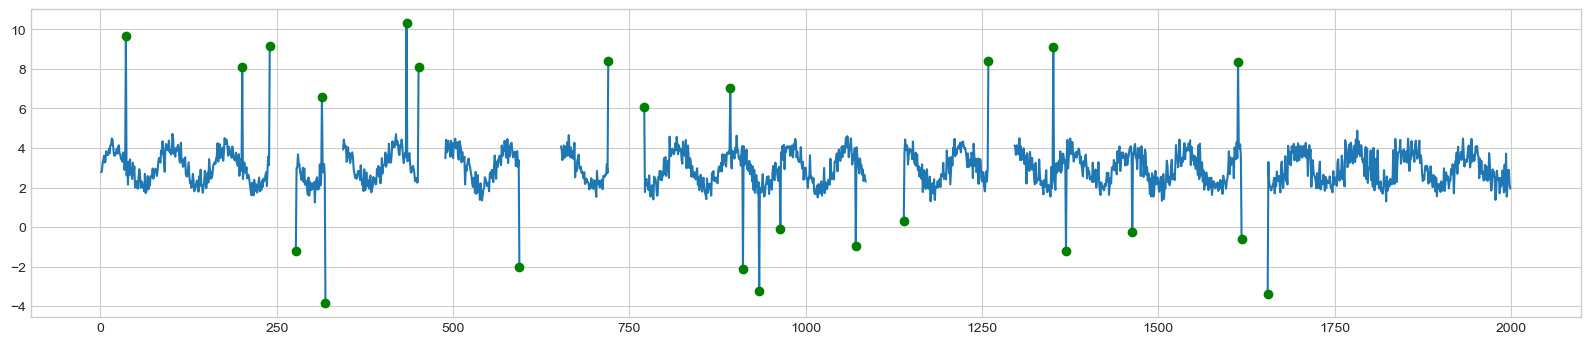

In [10]:
import json
import pandas as  pd
import matplotlib.pyplot as plt
json_path = "D:/company/project/anomaly_detection_point/spike_detect/self_test/data/生成的数据/both/both1.1.json"
with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
# print(data)
s = data['series']['s1']  # list
# print(s)
plt.figure(figsize=(20, 4))
actual_index = data['actual_index']['s1']
checkout_list = [s[i] for i in actual_index]
print(actual_index)
# print(checkout_list)

plt.plot(s)
plt.plot(actual_index, checkout_list, marker='o', linestyle='', color='g')


timestamp_list  = pd.date_range(start='2024-06-01', periods=len(s), freq='D')
s = pd.DataFrame(data=s, index=timestamp_list, columns=['Value'])


center True
2024-06-01         NaN
2024-06-02         NaN
2024-06-03    2.769925
2024-06-04    2.828583
2024-06-05    3.219674
                ...   
2029-11-17    1.537632
2029-11-18    2.211177
2029-11-19    2.885088
2029-11-20    2.891247
2029-11-21    2.141344
Freq: D, Name: Value, Length: 2000, dtype: float64
s_rolling_left 
 2024-06-01         NaN
2024-06-02         NaN
2024-06-03    2.769925
2024-06-04    2.799254
2024-06-05    2.828583
                ...   
2029-11-17    1.849826
2029-11-18    2.211177
2029-11-19    2.211177
2029-11-20    2.885088
2029-11-21    2.885088
Freq: D, Name: Value, Length: 2000, dtype: float64
2029-11-21    1.939033
2029-11-20    2.141344
2029-11-19    2.891247
2029-11-18    2.885088
2029-11-17    2.211177
                ...   
2024-06-05    3.385573
2024-06-04    3.219674
2024-06-03    2.828583
2024-06-02    2.769925
2024-06-01         NaN
Freq: -1D, Name: Value, Length: 2000, dtype: float64
3 median
2029-11-21    1.939033
2029-11-20    2.040188
20

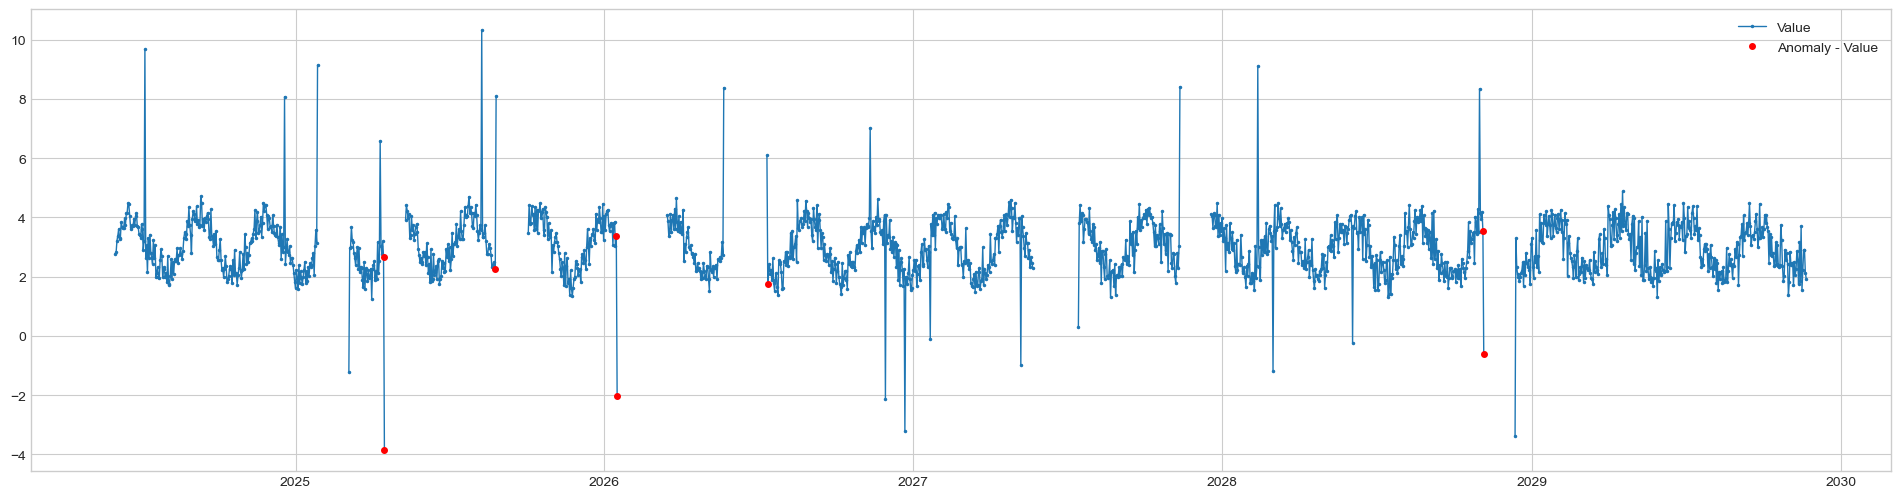

In [11]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
# import matplotlib.pyplot as plt
persist_ad = PersistAD(c=4.0, side='negative', min_periods = 1, window=3, agg="median")
anomalies = persist_ad.fit_detect(s)
# plt.plot(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_tag="marker", anomaly_color='red', figsize=(24,6));
pred_index = anomalies.reset_index().index[anomalies['Value'] == True].tolist()


In [ ]:
print("actual_index", "\n", actual_index)
print("pred_index", "\n", pred_index)

## 1.2

In [5]:
from src.adtk.transformer import RollingAggregate

In [12]:
json_path = "D:/company/project/anomaly_detection_point/spike_detect/self_test/data/生成的数据/both/both1.1.json"
with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
# print(data)
s = data['series']['s1']  # list
timestamp_list  = pd.date_range(start='2024-06-01', periods=len(s), freq='D')
s = pd.DataFrame(data=s, index=timestamp_list, columns=['Value'])


In [13]:
window_size = 3
agg = 'median'
min_periods =1
rolling_agg_class = RollingAggregate(window=window_size, agg=agg, min_periods=min_periods)
result_class = rolling_agg_class.transform(s)

print(result_class)

               Value
2024-06-01       NaN
2024-06-02  2.769925
2024-06-03  2.799254
2024-06-04  2.828583
2024-06-05  3.219674
...              ...
2029-11-17  2.211177
2029-11-18  2.211177
2029-11-19  2.885088
2029-11-20  2.885088
2029-11-21  2.141344

[2000 rows x 1 columns]


In [1]:
from src.adtk.transformer import DoubleRollingAggregate
import json
import pandas as pd

In [2]:
json_path = "D:/company/project/anomaly_detection_point/spike_detect/self_test/data/生成的数据/both/both1.1.json"
with open(json_path, 'r', encoding='utf-8') as json_file:
        data = json.load(json_file)
# print(data)
s = data['series']['s1']  # list
timestamp_list  = pd.date_range(start='2024-06-01', periods=len(s), freq='D')
s = pd.DataFrame(data=s, index=timestamp_list, columns=['Value'])


In [4]:
window_size = 3
agg = 'mean'
min_periods =1
center = True
diff = 'l1'


double_rolling_agg_class = DoubleRollingAggregate(window=window_size, agg=agg, center=center, min_periods=min_periods, diff=diff)
result_class = double_rolling_agg_class.transform(s)

print("results", "\n", result_class)

center True
s_rolling_left 
 2024-06-01         NaN
2024-06-02         NaN
2024-06-03    2.769925
2024-06-04    2.799254
2024-06-05    2.939394
                ...   
2029-11-17    2.366840
2029-11-18    2.487290
2029-11-19    2.211299
2029-11-20    2.662504
2029-11-21    2.639226
Freq: D, Name: Value, Length: 2000, dtype: float64
s_rolling_right 
 2024-06-01    2.799254
2024-06-02    2.939394
2024-06-03    3.144610
2024-06-04    3.403545
2024-06-05    3.418114
                ...   
2029-11-17    2.662504
2029-11-18    2.639226
2029-11-19    2.323875
2029-11-20    2.040188
2029-11-21    1.939033
Freq: D, Name: Value, Length: 2000, dtype: float64
l1 
 2024-06-01         NaN
2024-06-02         NaN
2024-06-03    0.374685
2024-06-04    0.604291
2024-06-05    0.478720
                ...   
2029-11-17    0.295664
2029-11-18    0.151936
2029-11-19    0.112576
2029-11-20    0.622316
2029-11-21    0.700194
Freq: D, Name: Value, Length: 2000, dtype: float64
results 
                Value
2024-

## 2

In [1]:
import pandas as pd
from src.adtk.data import validate_series
s = pd.read_csv('../docs/notebooks/data/price_short_modified.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\ms28175\AppData\Local\Temp\ipykernel_10584\3976204003.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_short_modified.csv', index_col="Time", parse_dates=True, squeeze=True)


Time
2017-05-02 00:00:00      NaN
2017-05-02 01:00:00    78.00
2017-05-02 02:00:00    22.05
2017-05-02 03:00:00    20.50
2017-05-02 04:00:00    20.49
                       ...  
2017-05-10 03:00:00    48.09
2017-05-10 04:00:00    49.34
2017-05-10 05:00:00    50.29
2017-05-10 06:00:00    49.27
2017-05-10 07:00:00    50.43
Freq: H, Name: Price ($), Length: 200, dtype: float64
s_rolling_left 
 Time
2017-05-02 00:00:00      NaN
2017-05-02 01:00:00    78.00
2017-05-02 02:00:00    22.05
2017-05-02 03:00:00    20.50
2017-05-02 04:00:00    20.49
                       ...  
2017-05-10 03:00:00    48.09
2017-05-10 04:00:00    49.34
2017-05-10 05:00:00    50.29
2017-05-10 06:00:00    49.27
2017-05-10 07:00:00    50.43
Freq: H, Name: Price ($), Length: 200, dtype: float64
Time
2017-05-10 07:00:00    49.86
2017-05-10 06:00:00    50.43
2017-05-10 05:00:00    49.27
2017-05-10 04:00:00    50.29
2017-05-10 03:00:00    49.34
                       ...  
2017-05-02 04:00:00    21.11
2017-05-02 03:00:00

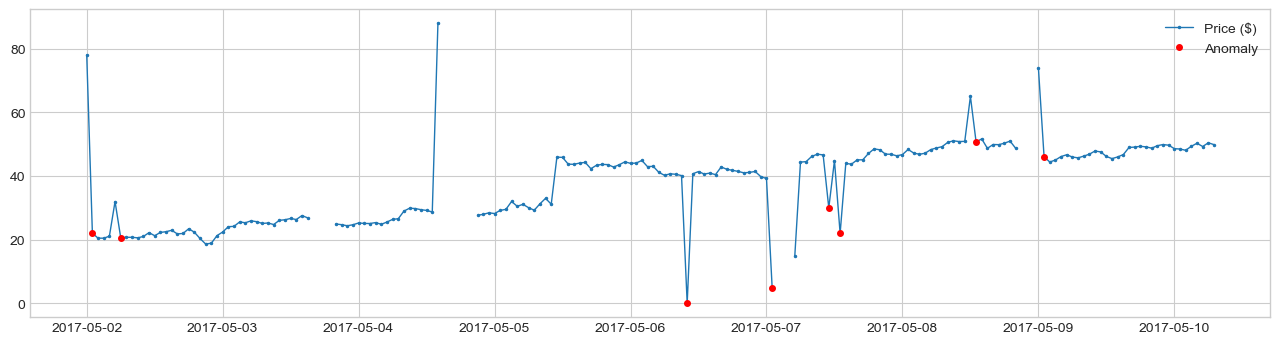

In [2]:
from src.adtk.detector import PersistAD
from src.adtk.visualization import plot
persist_ad = PersistAD(c=3.0, side='negative', min_periods = 1, window=1)
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_tag="marker")
pred_index = [i for i, v in enumerate(anomalies) if v]
# print(pred_index)

## 3.1

In [2]:
import math


def aggregate(values, agg):
    if agg == 'mean':
        return sum(values) / len(values)
    elif agg == 'sum':
        return sum(values)
    elif agg == 'min':
        return min(values)
    elif agg == 'max':
        return max(values)
    else:
        raise ValueError(f"Unsupported aggregation function: {agg}")


def rolling(data, window, agg='mean', center=False, min_periods=None, closed=None):
    result = []
    length = len(data)
    if min_periods is None:
        min_periods = window

    def get_window_slice(center_index):
        if center:
            start = max(center_index - window // 2, 0)
            end = min(center_index + window // 2 + 1, length)
        else:
            start = max(center_index - window + 1, 0)
            end = center_index + 1
        return data[start:end]

    for i in range(length):
        window_slice = get_window_slice(i)
        print(window_slice)
        valid_values = [x for x in window_slice if x is not None and not math.isnan(x)]
        print(valid_values)
        if len(valid_values) >= min_periods:
            result.append(aggregate(valid_values, agg))
        else:
            result.append(None)

    return result

In [3]:
def rolling_aggregate(s, window, agg='mean', center=False, min_periods=None):
    data = s.tolist()
    if isinstance(window, str):
        window = pd.Timedelta(window).days  # Assuming daily frequency for simplicity
    result = rolling(data, window, agg, center, min_periods)
    return pd.Series(result, index=s.index)

In [4]:
import pandas as pd
from src.adtk.transformer import RollingAggregate

def test_rolling_aggregate():
    # 生成时间序列数据
    dates = pd.date_range('2020-01-01', periods=15)
    data = pd.Series(range(15), index=dates)
    
    # 插入空值（NaN）
    data.iloc[3] = None
    data.iloc[7] = None
    data.iloc[8] = 15
    print(data)
    
    window = 3
    min_periods = 1
    aggs = ['mean', 'sum', 'min', 'max']

    for agg in aggs:
        rolling_agg_class = RollingAggregate(window=window, agg=agg, min_periods=min_periods)
        result_class = rolling_agg_class.transform(data)
        print(agg)
        print(rolling_agg_class)
        print(result_class)


        result_function = rolling_aggregate(data, window=window, agg=agg, min_periods=min_periods)
        print(result_function)
        assert result_class.equals(result_function), f"Results do not match for agg method: {agg}"

    print("All tests passed!")

test_rolling_aggregate()


2020-01-01     0.0
2020-01-02     1.0
2020-01-03     2.0
2020-01-04     NaN
2020-01-05     4.0
2020-01-06     5.0
2020-01-07     6.0
2020-01-08     NaN
2020-01-09    15.0
2020-01-10     9.0
2020-01-11    10.0
2020-01-12    11.0
2020-01-13    12.0
2020-01-14    13.0
2020-01-15    14.0
Freq: D, dtype: float64
mean
2020-01-01     0.000000
2020-01-02     0.500000
2020-01-03     1.000000
2020-01-04     1.500000
2020-01-05     3.000000
2020-01-06     4.500000
2020-01-07     5.000000
2020-01-08     5.500000
2020-01-09    10.500000
2020-01-10    12.000000
2020-01-11    11.333333
2020-01-12    10.000000
2020-01-13    11.000000
2020-01-14    12.000000
2020-01-15    13.000000
Freq: D, dtype: float64
[0.0]
[0.0]
[0.0, 1.0]
[0.0, 1.0]
[0.0, 1.0, 2.0]
[0.0, 1.0, 2.0]
[1.0, 2.0, nan]
[1.0, 2.0]
[2.0, nan, 4.0]
[2.0, 4.0]
[nan, 4.0, 5.0]
[4.0, 5.0]
[4.0, 5.0, 6.0]
[4.0, 5.0, 6.0]
[5.0, 6.0, nan]
[5.0, 6.0]
[6.0, nan, 15.0]
[6.0, 15.0]
[nan, 15.0, 9.0]
[15.0, 9.0]
[15.0, 9.0, 10.0]
[15.0, 9.0, 10.0]
[9

In [10]:
import pandas as pd
from src.adtk.transformer import RollingAggregate

def test_rolling_aggregate():
    # 生成时间序列数据
    dates = pd.date_range('2020-01-01', periods=15)
    data = pd.Series(range(15), index=dates)

    # 插入空值（NaN）
    data.iloc[3] = None
    data.iloc[7] = None
    data.iloc[8] = 15
    print(data)

    window = 3
    min_periods = 1
    closed = "right"
    aggs = ['mean', 'sum', 'min', 'max']

    for agg in aggs:
        rolling_agg_class = RollingAggregate(window=window, agg=agg, min_periods=min_periods)
        rolling_agg_class._closed = closed
        result_class = rolling_agg_class.transform(data)
        print(agg)
        print(rolling_agg_class)
        print(result_class)

    #
    #     result_function = rolling_aggregate(data, window=window, agg=agg, min_periods=min_periods)
    #     print(result_function)
    #     assert result_class.equals(result_function), f"Results do not match for agg method: {agg}"
    #
    # print("All tests passed!")

test_rolling_aggregate()


2020-01-01     0.0
2020-01-02     1.0
2020-01-03     2.0
2020-01-04     NaN
2020-01-05     4.0
2020-01-06     5.0
2020-01-07     6.0
2020-01-08     NaN
2020-01-09    15.0
2020-01-10     9.0
2020-01-11    10.0
2020-01-12    11.0
2020-01-13    12.0
2020-01-14    13.0
2020-01-15    14.0
Freq: D, dtype: float64
mean
2020-01-01     0.000000
2020-01-02     0.500000
2020-01-03     1.000000
2020-01-04     1.500000
2020-01-05     3.000000
2020-01-06     4.500000
2020-01-07     5.000000
2020-01-08     5.500000
2020-01-09    10.500000
2020-01-10    12.000000
2020-01-11    11.333333
2020-01-12    10.000000
2020-01-13    11.000000
2020-01-14    12.000000
2020-01-15    13.000000
Freq: D, dtype: float64
sum
2020-01-01     0.0
2020-01-02     1.0
2020-01-03     3.0
2020-01-04     3.0
2020-01-05     6.0
2020-01-06     9.0
2020-01-07    15.0
2020-01-08    11.0
2020-01-09    21.0
2020-01-10    24.0
2020-01-11    34.0
2020-01-12    30.0
2020-01-13    33.0
2020-01-14    36.0
2020-01-15    39.0
Freq: D, dtyp

## 3.2

In [ ]:
def double_rolling(data, window, agg='mean', center=False, min_periods=None):

        if not isinstance(window, tuple):
            window = (window, window)
        if not isinstance(agg, tuple):
            agg = (agg, agg)
        if not isinstance(min_periods, tuple):
            min_periods = (min_periods, min_periods)



In [5]:
from src.adtk.transformer import DoubleRollingAggregate

def test_double_rolling_aggregate():
    # 生成时间序列数据
    dates = pd.date_range('2020-01-01', periods=15)
    data = pd.Series(range(15), index=dates)

    # 插入空值（NaN）
    data.iloc[3] = None
    data.iloc[7] = None
    data.iloc[8] = 15
    print(data)

    window = (3, 1)
    min_periods = (1, 1)
    aggs = ['mean', 'sum', 'min', 'max']

    for agg in aggs:
        double_rolling_agg_class = DoubleRollingAggregate(window=window, agg=agg, min_periods=min_periods)
        result_class = double_rolling_agg_class.transform(data)
        print(agg)
        print(result_class)


    #     result_function = rolling_aggregate(data, window=window, agg=agg, min_periods=min_periods)
    #     print(result_function)
    #     assert result_class.equals(result_function), f"Results do not match for agg method: {agg}"
    #
    # print("All tests passed!")

test_double_rolling_aggregate()

2020-01-01     0.0
2020-01-02     1.0
2020-01-03     2.0
2020-01-04     NaN
2020-01-05     4.0
2020-01-06     5.0
2020-01-07     6.0
2020-01-08     NaN
2020-01-09    15.0
2020-01-10     9.0
2020-01-11    10.0
2020-01-12    11.0
2020-01-13    12.0
2020-01-14    13.0
2020-01-15    14.0
Freq: D, dtype: float64
mean
2020-01-01         NaN
2020-01-02    1.000000
2020-01-03    1.500000
2020-01-04         NaN
2020-01-05    2.500000
2020-01-06    2.000000
2020-01-07    1.500000
2020-01-08         NaN
2020-01-09    9.500000
2020-01-10    1.500000
2020-01-11    2.000000
2020-01-12    0.333333
2020-01-13    2.000000
2020-01-14    2.000000
2020-01-15    2.000000
Freq: D, dtype: float64
sum
2020-01-01     NaN
2020-01-02     1.0
2020-01-03     1.0
2020-01-04     NaN
2020-01-05     1.0
2020-01-06     1.0
2020-01-07     3.0
2020-01-08     NaN
2020-01-09     4.0
2020-01-10    12.0
2020-01-11    14.0
2020-01-12    23.0
2020-01-13    18.0
2020-01-14    20.0
2020-01-15    22.0
Freq: D, dtype: float64
min


In [ ]:
# ============================== 修改测试部分2 ==============================

By default, `PersistAD` only check one previous value, which is good at capturing additive anomaly in short-term scale, but not in long-term scale because it is too near-sighted. 

In the following example, it fails to capture meaningful drops of price in a longer time scale.

In [12]:
s = pd.read_csv('../docs/notebooks/data/price_long.csv', index_col="Time", parse_dates=True, squeeze=True)
s = validate_series(s)

C:\Users\ms28175\AppData\Local\Temp\ipykernel_23076\847039227.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  s = pd.read_csv('../docs/notebooks/data/price_long.csv', index_col="Time", parse_dates=True, squeeze=True)


D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


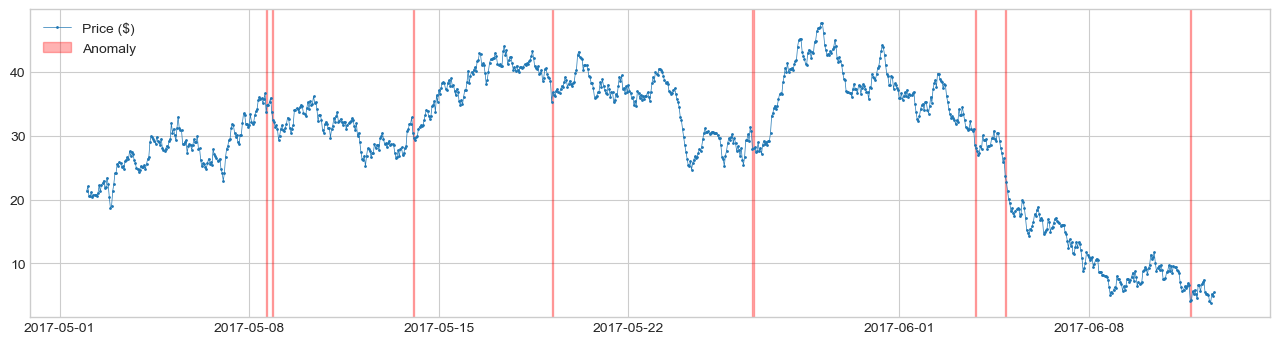

In [13]:
persist_ad = PersistAD(c=1.5, side='negative')
anomalies = persist_ad.fit_detect(s)
plot(s, anomaly=anomalies, anomaly_color='red');

We may change the parameter `window` to a number greater than 1, and the detector will compare a value to the median or mean of its preceding time window. This will capture anomalous changes in mid- to long-term scale, because it is less near-sighted. In the same example as above, it detects drops of price in the long-term scale successfully.

In [14]:
persist_ad.window = 24
anomalies = persist_ad.fit_detect(s)

D:\company\project\adtk\src\adtk\data\_data.py:164: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for t, v in time_window_end_series.iteritems():  # type: pd.Timestamp, int


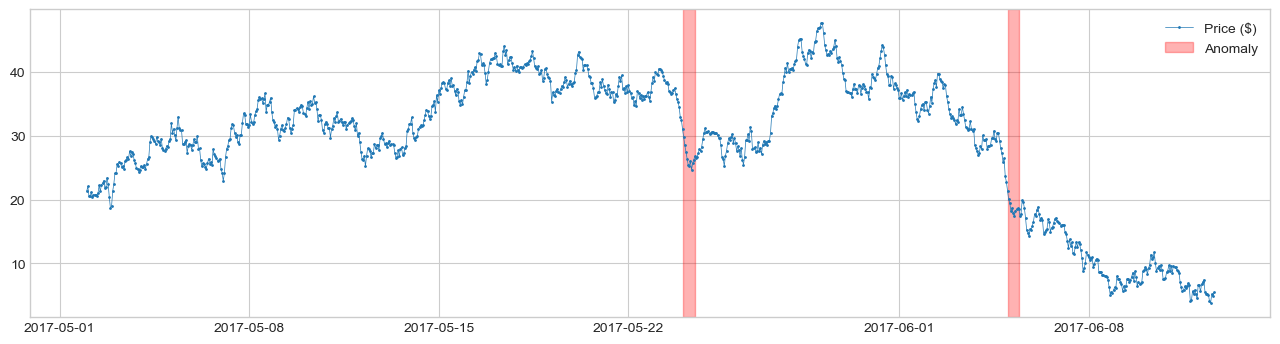

In [15]:
plot(s, anomaly=anomalies, anomaly_color='red');